# Data Cleaning and EDA

## Importing Dataset and Conversion from .arff

In [ ]:
# Website Phishing data from https://archive.ics.uci.edu/dataset/379/website+phishing
path = "/content/drive/MyDrive/CSI 470 - Big Data and Analytics/PhishingData.arff"

print("Dataset file path:", path)

Dataset file path: /content/drive/MyDrive/CSI 470 - Big Data and Analytics/PhishingData.arff


In [ ]:
import pandas as pd
from scipy.io import arff

# arff.loadarff necessary for arff file format
data = arff.loadarff(path)

# extracting column names and convert into dataframe
df = pd.DataFrame(data[0])

# decode byte strings to regular strings
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.decode('utf-8')

# NOTE: Legitimate, Suspicious, and Phishy values are represented by numerical values 1,0, and -1 respectively
df.head(15)

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
5,-1,-1,1,-1,-1,1,0,-1,0,1
6,1,-1,0,1,-1,0,0,1,0,-1
7,1,0,1,1,0,0,0,1,1,-1
8,-1,-1,0,-1,-1,-1,-1,1,0,0
9,-1,0,-1,-1,1,1,0,-1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SFH                1353 non-null   object
 1   popUpWidnow        1353 non-null   object
 2   SSLfinal_State     1353 non-null   object
 3   Request_URL        1353 non-null   object
 4   URL_of_Anchor      1353 non-null   object
 5   web_traffic        1353 non-null   object
 6   URL_Length         1353 non-null   object
 7   age_of_domain      1353 non-null   object
 8   having_IP_Address  1353 non-null   object
 9   Result             1353 non-null   object
dtypes: object(10)
memory usage: 105.8+ KB


In [ ]:
# calculate descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)

         SFH popUpWidnow SSLfinal_State Request_URL URL_of_Anchor web_traffic  \
count   1353        1353           1353        1353          1353        1353   
unique     3           3              3           3             3           3   
top        1           0              1          -1            -1           0   
freq     767         639            751         617           610         473   

       URL_Length age_of_domain having_IP_Address Result  
count        1353          1353              1353   1353  
unique          3             2                 2      3  
top             0             1                 0     -1  
freq          563           825              1198    702  


In [ ]:
import numpy as np

# calculate mean, median, and mode
print("Mean:\n", np.mean(df_numeric))
print("\nMedian:\n", np.median(df_numeric))

# Mode is more complex with numpy for multi-mode cases, sticking with pandas for simplicity
print("\nMode:\n", df_numeric.mode())

Mean:
 0.02254249815225425

Median:
 0.0

Mode:
    SFH  popUpWidnow  SSLfinal_State  Request_URL  URL_of_Anchor  web_traffic  \
0    1            0               1           -1             -1            0   

   URL_Length  age_of_domain  having_IP_Address  Result  
0           0              1                  0      -1  


Result
-1    702
1     548
0     103
Name: count, dtype: int64 

Index(['-1', '1', '0'], dtype='object', name='Result') 

[702 548 103] 



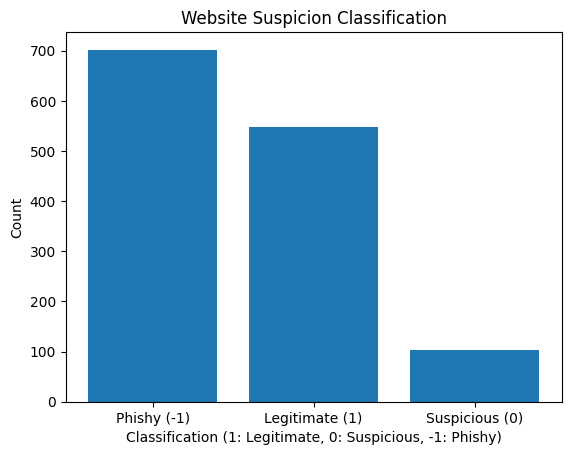

In [ ]:
import matplotlib.pyplot as plt

# count the occurrences of each category
result_counts = df['Result'].value_counts()
print(result_counts, "\n")
print(result_counts.index, "\n")
print(result_counts.values, "\n")

# create a bar plot
plt.bar(result_counts.index, result_counts.values)

plt.title('Website Suspicion Classification')

# title of x-axis / y-axis
plt.xlabel('Classification (1: Legitimate, 0: Suspicious, -1: Phishy)')
plt.ylabel('Count')

plt.xticks(result_counts.index, ['Phishy (-1)', 'Legitimate (1)', 'Suspicious (0)']) # custom labels for x-axis
plt.show()